In [1]:
import numpy as np 
import os
from utils_data import interpolation_glorys_raw_data,interpolation_era5_raw_data
import xarray as xr
# Define a reference grid :

size_grid = "8th"
coef = 2
lon_ref = np.linspace(-180,180,1441*coef)[:-1]
lat_ref = np.linspace(-90,90,721*coef)[:-1]

def regrid_da(da: xr.DataArray):
        new_da = da.interp({"lat":lat_ref, "lon":lon_ref}, method="linear")
        return new_da

# Define depth
depth=15

# Define a period of training : 
year_start = 2010
year_end = 2010

# Create a directory
"""
folder_data = f"/Odyssey/private/t22picar/data/train_glorys_{depth}_{size_grid}/"
if not os.path.exists(folder_data):
    os.makedirs(folder_data)
    print(f"Le dossier '{folder_data}' a été créé.")
# 

# Interpolation of raw glorys data for train and eval (Also compute the mean and std ?)

interpolation_glorys_raw_data(year_start,year_end,depth,folder_data)

# Interpolation of era5 data for train and eval period

interpolation_era5_raw_data(year_start,year_end,depth,folder_data)

"""

'\nfolder_data = f"/Odyssey/private/t22picar/data/train_glorys_{depth}_{size_grid}/"\nif not os.path.exists(folder_data):\n    os.makedirs(folder_data)\n    print(f"Le dossier \'{folder_data}\' a été créé.")\n# \n\n# Interpolation of raw glorys data for train and eval (Also compute the mean and std ?)\n\ninterpolation_glorys_raw_data(year_start,year_end,depth,folder_data)\n\n# Interpolation of era5 data for train and eval period\n\ninterpolation_era5_raw_data(year_start,year_end,depth,folder_data)\n\n'

In [19]:
print(year_start)
folder_glorys = f"/Odyssey/private/t22picar/data/glorys_{depth}m/"
file_glorys = f"glorys_multivar_{depth}m_{year_start}.nc"
maps_glorys = xr.open_dataset(folder_glorys+file_glorys).sel(time=slice(f"{year_start}-01-01",f"{year_start}-12-31"))
maps_glorys = maps_glorys.sel(depth=maps_glorys.depth[0]).drop_vars("mlotst")

if depth==15:
    folder_glorys_0m = f"/Odyssey/private/t22picar/data/glorys_0m/"
    file_glorys_0m = f"glorys_multivar_0m_{year_start}.nc"
    maps_glorys_0m = xr.open_dataset(folder_glorys_0m+file_glorys_0m).sel(time=slice(f"{year_start}-01-01",f"{year_start}-12-31"))
    maps_glorys_0m = maps_glorys_0m.sel(depth=maps_glorys_0m.depth[0]).thetao       
    maps_glorys["thetao"] =  maps_glorys_0m

2010


In [16]:
import matplotlib.pyplot as plt

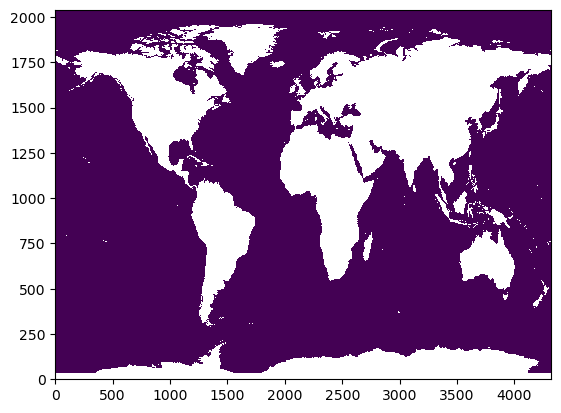

In [20]:
plt.pcolormesh(maps_glorys.thetao[0]-maps_glorys_0m[0])

<xarray.DataArray 'thetao' (time: 365, latitude: 2041, longitude: 4320)> Size: 26GB
[3218248800 values with dtype=float64]
Coordinates:
    depth      float32 4B 0.494
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    valid_min:      -32766
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C
    valid_max:      21306

In [6]:
maps_glorys["thetao"]

<xarray.DataArray 'thetao' (time: 365, latitude: 2041, longitude: 4320)> Size: 26GB
[3218248800 values with dtype=float64]
Coordinates:
    depth      float32 4B 15.81
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 2010-01-01 2010-01-02 ... 2010-12-31
Attributes:
    long_name:      Temperature
    valid_max:      21306
    units:          degrees_C
    unit_long:      Degrees Celsius
    valid_min:      -32766
    standard_name:  sea_water_potential_temperature

In [ ]:
# Interpolation of testing data + add a correction and merge with previous data


# Add offset due to different mdt
maps.zos.values = maps.zos.values + offset
